#Import Library

In [1]:
from google.colab import files, data_table  # Mengimpor fitur unggah file & tampilan tabel interaktif dari Google Colab
import pandas as pd                         # Mengimpor pandas untuk mengolah data (data frame)

files: untuk mengunggah/unduh file.

data_table: untuk menampilkan tabel interaktif (bisa discroll & difilter).

Library pandas dengan nama pendek pd.
Digunakan untuk membaca dan mengolah data seperti file Excel atau CSV.

#Load Dataset

In [2]:
uploaded = files.upload()  # Membuka dialog untuk mengunggah file dari komputer ke Colab

file_name = list(uploaded.keys())[0]       # Menyimpan nama file yang diunggah
df = pd.read_excel(file_name)              # Membaca file Excel ke dalam DataFrame

data_table.DataTable(df, include_index=False)  # Menampilkan data secara interaktif seperti Excel

Output hidden; open in https://colab.research.google.com to view.

# 1: Exploratory Data Analysis

In [3]:
# Menampilkan jumlah baris dan kolom dalam dataset
n_rows = df.shape[0]      # Mengambil jumlah baris (observasi)
n_columns = df.shape[1]   # Mengambil jumlah kolom (fitur/variabel)
print(f"\nJumlah baris: {n_rows}")
print(f"Jumlah kolom: {n_columns}")

# Menampilkan informasi struktur dataset (nama kolom, tipe data, dan jumlah non-null)
print("\nKolom-kolom dalam dataset:")
df.info()


Jumlah baris: 22480
Jumlah kolom: 34

Kolom-kolom dalam dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22480 entries, 0 to 22479
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   NIK                 22480 non-null  object        
 1   Nama                22480 non-null  object        
 2   JK                  22480 non-null  object        
 3   Tgl Lahir           22480 non-null  datetime64[ns]
 4   BB Lahir            22477 non-null  float64       
 5   TB Lahir            22474 non-null  float64       
 6   Nama Ortu           22442 non-null  object        
 7   Prov                22480 non-null  object        
 8   Kab/Kota            22480 non-null  object        
 9   Kec                 22480 non-null  object        
 10  Pukesmas            22480 non-null  object        
 11  Desa/Kel            22480 non-null  object        
 12  Posyandu            22472 non-null  

Bagian ini memberi tahu kita seberapa besar data yang sedang kita analisis — berapa banyak data (baris) dan berapa banyak fitur/kolom. Menunjukkan detail setiap kolom: namanya, tipe datanya (angka, teks, dll.), dan apakah ada data yang kosong (null) atau tidak.

In [4]:
# Menampilkan jumlah data berdasarkan jenis kelamin
print("Jumlah data berdasarkan kolom 'JK':")
print(df['JK'].value_counts())  # Menghitung jumlah data untuk setiap kategori di kolom 'JK'

# Menentukan urutan kategori status gizi pada kolom BB/TB
kategori = [
    'Gizi Buruk',
    'Gizi Kurang',
    'Normal',
    'Beresiko Gizi Lebih',
    'Gizi Lebih',
    'Obesitas',
    'Outlier',
    '-'
]

# Mengubah kolom BB/TB menjadi tipe kategori terurut
df['BB/TB'] = pd.Categorical(df['BB/TB'], categories=kategori, ordered=True)

# Menampilkan jumlah data untuk setiap kategori BB/TB sesuai urutan yang ditentukan
print("\nJumlah data berdasarkan kategori BB/TB:")
print(df['BB/TB'].value_counts().reindex(kategori))

# Distribusi kategori BB/TB untuk laki-laki
print("\nDistribusi BB/TB pada data laki-laki:")
print(df[df['JK'] == 'L']['BB/TB'].value_counts().reindex(kategori))

# Distribusi kategori BB/TB untuk perempuan
print("\nDistribusi BB/TB pada data perempuan:")
print(df[df['JK'] == 'P']['BB/TB'].value_counts().reindex(kategori))

Jumlah data berdasarkan kolom 'JK':
JK
L    12126
P    10354
Name: count, dtype: int64

Jumlah data berdasarkan kategori BB/TB:
BB/TB
Gizi Buruk                86
Gizi Kurang              991
Normal                 19217
Beresiko Gizi Lebih     1219
Gizi Lebih               410
Obesitas                 257
Outlier                  246
-                         54
Name: count, dtype: int64

Distribusi BB/TB pada data laki-laki:
BB/TB
Gizi Buruk                51
Gizi Kurang              608
Normal                 10251
Beresiko Gizi Lebih      671
Gizi Lebih               249
Obesitas                 148
Outlier                  122
-                         26
Name: count, dtype: int64

Distribusi BB/TB pada data perempuan:
BB/TB
Gizi Buruk               35
Gizi Kurang             383
Normal                 8966
Beresiko Gizi Lebih     548
Gizi Lebih              161
Obesitas                109
Outlier                 124
-                        28
Name: count, dtype: int64


Bagian ini menghitung berapa banyak data laki-laki dan perempuan yang ada di kolom ‘JK’ (Jenis Kelamin). Kita menentukan urutan kategori status gizi dari yang paling kurang hingga obesitas (dan termasuk data tidak wajar seperti "Outlier" atau "-"). Kolom ‘BB/TB’ diubah menjadi tipe data kategori yang berurutan, supaya nanti saat diolah (misalnya divisualisasikan), urutannya sesuai logika gizi.

Menampilkan jumlah data untuk masing-masing status gizi, sesuai urutan yang sudah kita tentukan sebelumnya.

 Menampilkan sebaran status gizi secara terpisah: untuk laki-laki dan untuk perempuan. Ini penting untuk melihat apakah distribusi data seimbang atau tidak antar jenis kelamin.

In [5]:
import re # Mengimpor modul regex (regular expression) untuk memproses teks


# Fungsi untuk mengonversi usia dari format teks menjadi bulan
def usia_dalam_bulan(usia_str):
    if pd.isnull(usia_str):
        return None  # Jika kosong, kembalikan None

    usia_str = str(usia_str).lower()  # Ubah ke huruf kecil untuk standarisasi (“Tahun” jadi “tahun”)

    angka = re.findall(r'\d+', usia_str)  # Ambil semua angka dari string

    if len(angka) == 1:
        # Jika hanya ada satu angka
        if 'tahun' in usia_str or 'th' in usia_str:
            return int(angka[0]) * 12  # Hanya tahun → dikali 12
        elif 'bulan' in usia_str or 'bln' in usia_str or 'm' in usia_str:
            return int(angka[0])  # Hanya bulan → langsung dikembalikan
        else:
            return None
    elif len(angka) >= 2:
        # Jika terdapat angka tahun dan bulan
        tahun = int(angka[0])
        bulan = int(angka[1])
        return tahun * 12 + bulan  # Gabungkan jadi total bulan

    return None  # Jika tidak sesuai format

# Terapkan fungsi ke kolom "Usia Saat Ukur" dan buat kolom baru "Usia/Bulan"
df['Usia/Bulan'] = df['Usia Saat Ukur'].apply(usia_dalam_bulan)

# Tampilkan 10 data teratas sebagai contoh hasil konversi
print(df[['Usia Saat Ukur', 'Usia/Bulan']].head(10))


                Usia Saat Ukur  Usia/Bulan
0  2 Tahun - 6 Bulan - 26 Hari          30
1   2 Tahun - 7 Bulan - 8 Hari          31
2  1 Tahun - 3 Bulan - 19 Hari          15
3  3 Tahun - 6 Bulan - 29 Hari          42
4  1 Tahun - 3 Bulan - 11 Hari          15
5  1 Tahun - 4 Bulan - 12 Hari          16
6   0 Tahun - 0 Bulan - 0 Hari           0
7  1 Tahun - 1 Bulan - 16 Hari          13
8  3 Tahun - 1 Bulan - 19 Hari          37
9   0 Tahun - 0 Bulan - 0 Hari           0


In [6]:
# Cek kolom yang tersedia
kolom_pilihan = ['Usia/Bulan', 'Berat', 'Tinggi', 'Lila', 'Lipa', 'BB/TB', 'JK']
missing_cols = [col for col in kolom_pilihan if col not in df.columns]
if missing_cols:
    print(f"Kolom berikut tidak ditemukan: {missing_cols}")
else:
    # Filter usia di kolom penting 11-59 bulan
    df_filtered = df[(df['Usia/Bulan'] >= 11) & (df['Usia/Bulan'] <= 59)][kolom_pilihan].copy()

    # Pisahkan berdasarkan jenis kelamin
    df_laki = df_filtered[df_filtered['JK'] == 'L'].reset_index(drop=True)
    df_perempuan = df_filtered[df_filtered['JK'] == 'P'].reset_index(drop=True)

    print(f"Jumlah data laki-laki: {len(df_laki)}")
    print(f"Jumlah data perempuan: {len(df_perempuan)}")

    # Distribusi kategori status gizi (opsional tapi informatif)
    print("\nDistribusi BB/TB Laki-laki:")
    print(df_laki['BB/TB'].value_counts())

    print("\nDistribusi BB/TB Perempuan:")
    print(df_perempuan['BB/TB'].value_counts())


Jumlah data laki-laki: 10222
Jumlah data perempuan: 8975

Distribusi BB/TB Laki-laki:
BB/TB
Normal                 8724
Beresiko Gizi Lebih     520
Gizi Kurang             502
Gizi Lebih              214
Obesitas                130
Outlier                  97
Gizi Buruk               35
-                         0
Name: count, dtype: int64

Distribusi BB/TB Perempuan:
BB/TB
Normal                 7797
Beresiko Gizi Lebih     469
Gizi Kurang             337
Gizi Lebih              139
Outlier                 111
Obesitas                102
Gizi Buruk               20
-                         0
Name: count, dtype: int64


Kode ini bertujuan untuk menganalisis data status gizi anak berdasarkan jenis kelamin dan usia. Langkah pertama adalah menentukan kolom-kolom penting yang akan digunakan, yaitu usia, berat badan, tinggi badan, lingkar lengan atas (Lila), lingkar perut (Lipa), status gizi berdasarkan BB/TB, dan jenis kelamin. Kode kemudian memeriksa apakah semua kolom tersebut tersedia di dalam dataset.

Jika semua kolom ada, maka data akan difilter untuk hanya mengambil anak-anak yang berusia antara 11 hingga 59 bulan. Setelah itu, data dipisahkan menjadi dua kelompok: anak laki-laki dan anak perempuan. Jumlah data untuk masing-masing kelompok ditampilkan, sehingga kita tahu berapa banyak anak laki-laki dan perempuan dalam rentang usia tersebut.

Selanjutnya, kode menghitung dan menampilkan distribusi status gizi (BB/TB) untuk masing-masing kelompok, baik laki-laki maupun perempuan. Hal ini memberikan gambaran tentang kondisi gizi anak-anak dalam setiap kelompok berdasarkan klasifikasi seperti gizi buruk, gizi kurang, normal, hingga obesitas.

In [7]:
# Tampilkan tabel interaktif
print("\nData Laki-laki:")
data_table.DataTable(df_laki, include_index=False)

Output hidden; open in https://colab.research.google.com to view.

In [8]:
print("Data Perempuan:")
data_table.DataTable(df_perempuan, include_index=False)

Output hidden; open in https://colab.research.google.com to view.

/tmp/ipython-input-652003722.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gabungan['BB/TB'] = pd.Categorical(df_gabungan['BB/TB'], categories=urutan_kategori, ordered=True)


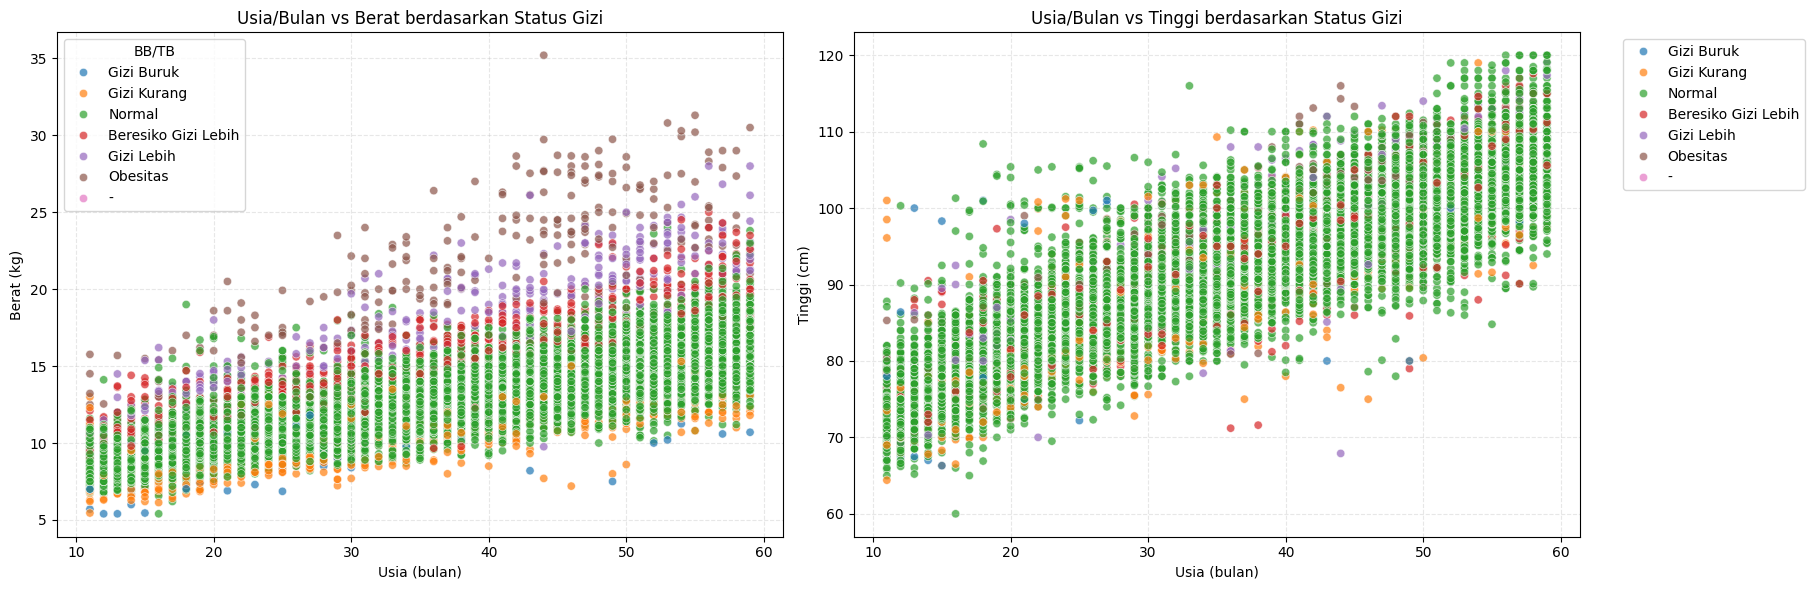

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gabungkan df_laki dan df_perempuan
df_gabungan = pd.concat([df_laki, df_perempuan], ignore_index=True)

# Bersihkan data
df_gabungan = df_gabungan.dropna(subset=['Usia/Bulan', 'Berat', 'Tinggi', 'BB/TB'])
df_gabungan = df_gabungan[df_gabungan['BB/TB'] != 'Outlier']

# Pastikan urutan kategori BB/TB tetap
urutan_kategori = [
    'Gizi Buruk', 'Gizi Kurang', 'Normal',
    'Beresiko Gizi Lebih', 'Gizi Lebih', 'Obesitas', "-"
]
df_gabungan['BB/TB'] = pd.Categorical(df_gabungan['BB/TB'], categories=urutan_kategori, ordered=True)

# Buat scatter plot
plt.figure(figsize=(16, 6))

# Plot 1: Usia vs Berat
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=df_gabungan,
    x='Usia/Bulan',
    y='Berat',
    hue='BB/TB',
    palette='tab10',
    alpha=0.7,
    edgecolor='w',
    linewidth=0.5
)
plt.title('Usia/Bulan vs Berat berdasarkan Status Gizi')
plt.xlabel('Usia (bulan)')
plt.ylabel('Berat (kg)')
plt.grid(True, linestyle='--', alpha=0.3)

# Plot 2: Usia vs Tinggi
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=df_gabungan,
    x='Usia/Bulan',
    y='Tinggi',
    hue='BB/TB',
    palette='tab10',
    alpha=0.7,
    edgecolor='w',
    linewidth=0.5
)
plt.title('Usia/Bulan vs Tinggi berdasarkan Status Gizi')
plt.xlabel('Usia (bulan)')
plt.ylabel('Tinggi (cm)')
plt.grid(True, linestyle='--', alpha=0.3)

# Gabungkan legend dan tampilkan
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

1. Menggabungkan data anak laki-laki dan perempuan ke dalam satu DataFrame (df_gabungan).

2. Membersihkan data dengan cara:

Menghapus baris yang memiliki nilai kosong (NaN) pada kolom usia, berat, tinggi, atau status gizi.

Menghapus baris dengan status gizi “Outlier”.

3. Mengatur urutan kategori status gizi agar tampilannya konsisten di visualisasi.

4. Membuat dua scatter plot (bersebelahan):

Plot pertama: menampilkan hubungan antara usia (dalam bulan) dan berat badan (kg).

Plot kedua: menampilkan hubungan antara usia dan tinggi badan (cm).

Titik-titik pada plot diberi warna berdasarkan status gizi (BB/TB) anak, agar kita bisa melihat distribusi gizi di berbagai rentang usia dan ukuran tubuh.

5. Ditambahkan juga grid agar grafik lebih mudah dibaca.

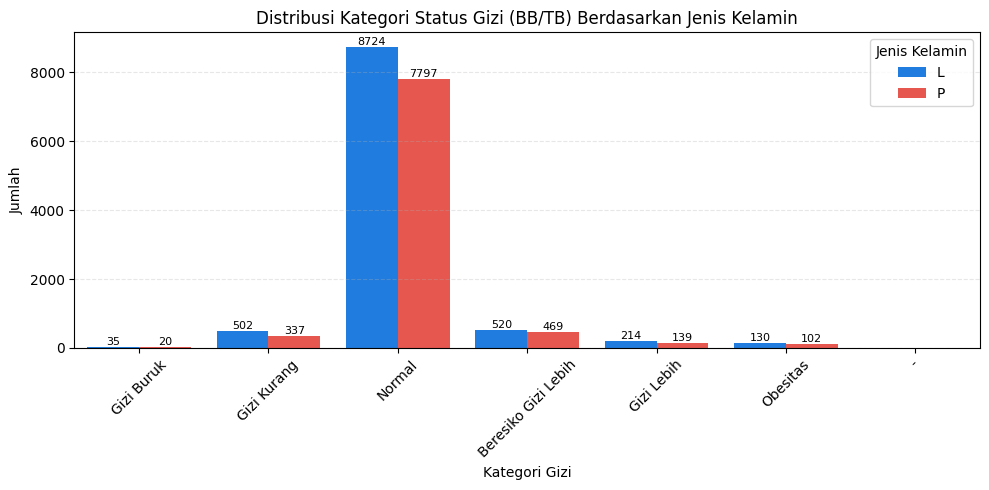

In [10]:
# Distribusi Kategori Status Gizi
df_plot = df_gabungan[df_gabungan['BB/TB'].isin(urutan_kategori)]

plt.figure(figsize=(10, 5))
ax = sns.countplot(
    data=df_plot,
    x='BB/TB',
    hue='JK',
    order=urutan_kategori,
    palette={'L': '#007BFF', 'P': '#FF4136'}  # Biru dan Merah
)

plt.title('Distribusi Kategori Status Gizi (BB/TB) Berdasarkan Jenis Kelamin')
plt.xlabel('Kategori Gizi')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(title='Jenis Kelamin')

# Tambahkan angka di atas setiap bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            p.get_x() + p.get_width() / 2,
            height + 1,
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=8
        )

plt.tight_layout()
plt.show()


Kode di atas digunakan untuk membuat visualisasi distribusi kategori status gizi anak berdasarkan jenis kelamin dalam bentuk countplot (diagram batang). Output dari kode ini sangat bermanfaat untuk melihat:

Jumlah anak dalam tiap kategori gizi.

Perbandingan jumlah anak laki-laki dan perempuan dalam setiap kategori.


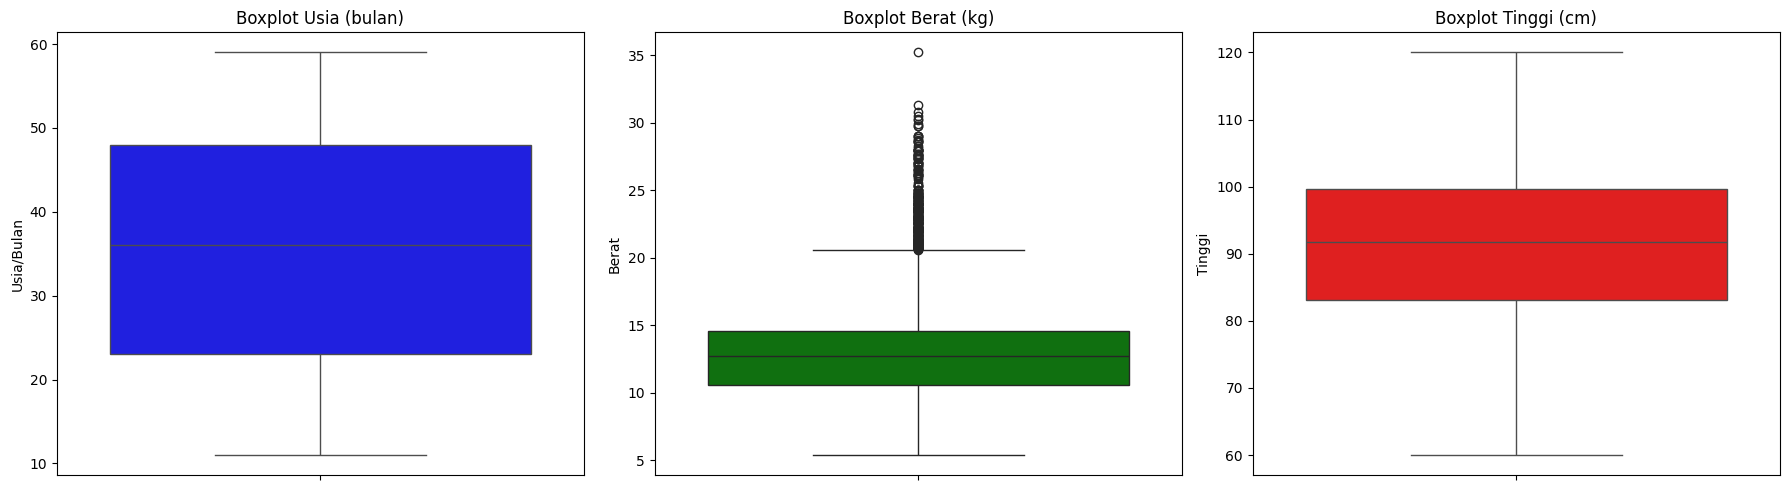


Kolom: Usia/Bulan
Q1: 23.00, Q3: 48.00, IQR: 25.00
Batas bawah: -14.50, Batas atas: 85.50
Jumlah outlier: 0

Kolom: Berat
Q1: 10.60, Q3: 14.60, IQR: 4.00
Batas bawah: 4.60, Batas atas: 20.60
Jumlah outlier: 309

Kolom: Tinggi
Q1: 83.10, Q3: 99.60, IQR: 16.50
Batas bawah: 58.35, Batas atas: 124.35
Jumlah outlier: 0


In [11]:
# Boxplot & Deteksi Outlier
plt.figure(figsize=(18, 5))

# Boxplot Usia/Bulan
plt.subplot(1, 3, 1)
sns.boxplot(data=df_gabungan, y='Usia/Bulan', color='blue')
plt.title('Boxplot Usia (bulan)')

# Boxplot Berat
plt.subplot(1, 3, 2)
sns.boxplot(data=df_gabungan, y='Berat', color='green')
plt.title('Boxplot Berat (kg)')

# Boxplot Tinggi
plt.subplot(1, 3, 3)
sns.boxplot(data=df_gabungan, y='Tinggi', color='red')
plt.title('Boxplot Tinggi (cm)')

plt.tight_layout()
plt.show()


# Fungsi deteksi outlier + cetak detail
def hitung_outlier_iqr(data, kolom, cetak_detail=False):
    Q1 = data[kolom].quantile(0.25)
    Q3 = data[kolom].quantile(0.75)
    IQR = Q3 - Q1
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR
    outlier = data[(data[kolom] < batas_bawah) | (data[kolom] > batas_atas)]

    if cetak_detail:
        print(f"\nKolom: {kolom}")
        print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
        print(f"Batas bawah: {batas_bawah:.2f}, Batas atas: {batas_atas:.2f}")
        print(f"Jumlah outlier: {len(outlier)}")

    return len(outlier)

# Hitung dan tampilkan outlier
outlier_usia = hitung_outlier_iqr(df_gabungan, 'Usia/Bulan', cetak_detail=True)
outlier_berat = hitung_outlier_iqr(df_gabungan, 'Berat', cetak_detail=True)
outlier_tinggi = hitung_outlier_iqr(df_gabungan, 'Tinggi', cetak_detail=True)

# 2. Preprocessing

In [12]:
# Daftar kategori target yang valid
kategori_valid = [
    'Gizi Buruk',
    'Gizi Kurang',
    'Normal',
    'Beresiko Gizi Lebih',
    'Gizi Lebih',
    'Obesitas'
]

# Filter data berdasarkan kategori valid
df_filtered = df_filtered[df_filtered['BB/TB'].isin(kategori_valid)].copy()


Membersihkan data dari kategori target yang tidak diinginkan sehingga hanya data dengan label gizi yang valid dan sesuai klasifikasi yang akan digunakan dalam analisis lebih lanjut atau model machine learning.

In [13]:
# Mengecek jumlah baris duplikat
jumlah_duplikat = df_filtered.duplicated().sum()
print(f"Jumlah data duplikat: {jumlah_duplikat}")

# Menampilkan data duplikat (jika ada)
df_duplikat = df_filtered[df_filtered.duplicated()]
print(df_duplikat)


Jumlah data duplikat: 907
       Usia/Bulan  Berat  Tinggi  Lila  Lipa                BB/TB JK
585            52   14.6   100.4   NaN   NaN               Normal  P
1363           58   13.8   100.0   NaN   NaN               Normal  L
1753           17    9.8    80.0   NaN   NaN               Normal  L
1927           33   12.0    87.0   NaN   NaN               Normal  P
2055           51   14.0   100.0   NaN   NaN               Normal  P
...           ...    ...     ...   ...   ...                  ... ..
22280          14    9.8    73.0   NaN   NaN  Beresiko Gizi Lebih  P
22285          17   10.1    80.0   NaN   NaN               Normal  L
22304          35   11.0    90.0   NaN   NaN          Gizi Kurang  L
22310          18   11.5    82.0   NaN   NaN               Normal  L
22322          43   12.5    95.0   NaN   NaN               Normal  P

[907 rows x 7 columns]


Tahapan ini digunakan untuk mendeteksi keberadaan data duplikat, yaitu baris yang isinya persis sama di semua kolom. Deteksi ini penting agar:

Tidak ada redundansi dalam analisis atau pelatihan model,

Hasil statistik atau machine learning tidak bias karena data yang sama dihitung lebih dari sekali.

In [14]:
# Menampilkan jumlah data sebelum menghapus duplikat
print(f"Jumlah data sebelum menghapus duplikat: {df_filtered.shape[0]}")

# Menghapus data duplikat
df_filtered = df_filtered.drop_duplicates()
# Menampilkan jumlah data setelah menghapus duplikat
print(f"Jumlah data setelah menghapus duplikat: {df_filtered.shape[0]}")

# Menampilkan contoh data setelah duplikat dihapus
print("\nContoh data setelah menghapus duplikat:")
print(df_filtered.head())


Jumlah data sebelum menghapus duplikat: 18989
Jumlah data setelah menghapus duplikat: 18082

Contoh data setelah menghapus duplikat:
   Usia/Bulan  Berat  Tinggi  Lila  Lipa   BB/TB JK
0          30   9.95    84.9   NaN   NaN  Normal  P
1          31  10.90    87.6   NaN   NaN  Normal  L
2          15   8.50    76.0   NaN   NaN  Normal  P
3          42  11.50    93.0   NaN   NaN  Normal  P
4          15   7.70    72.8   NaN   NaN  Normal  P


Memastikan data tidak memiliki salinan yang identik, sehingga hasil analisis dan pemodelan lebih akurat dan tidak bias.

In [15]:
# Menampilkan jumlah nilai NaN di setiap kolom
print("Jumlah nilai NaN per kolom:")
print(df_filtered.isna().sum())


Jumlah nilai NaN per kolom:
Usia/Bulan        0
Berat             0
Tinggi            0
Lila          17938
Lipa          18082
BB/TB             0
JK                0
dtype: int64


In [16]:
import pandas as pd
# 1. Buat DataFrame dari Tabel Standar WHO
# Data referensi WHO
data_who = {
    'Usia/Bulan': list(range(4, 60)),
    'Lila_L': [13.5, 13.8, 14.1, 14.2, 14.4, 14.5, 14.5, 14.6, 14.6, 14.6, 14.7, 14.7, 14.7, 14.8, 14.8, 14.8, 14.9, 14.9, 15.0, 15.0, 15.1, 15.2, 15.3, 15.3, 15.4, 15.5, 15.5, 15.6, 15.7, 15.7, 15.8, 15.8, 15.8, 15.9, 15.9, 15.9, 16.0, 16.0, 16.0, 16.1, 16.1, 16.1, 16.1, 16.1, 16.2, 16.2, 16.2, 16.3, 16.3, 16.3, 16.3, 16.3, 16.4, 16.4, 16.4, 16.5],
    'Lila_P': [13, 13.4, 13.6, 13.8, 13.9, 14, 14.1, 14.1, 14.2, 14.2, 14.2, 14.3, 14.3, 14.4, 14.4, 14.5, 14.5, 14.6, 14.7, 14.7, 14.8, 14.9, 15, 15, 15.1, 15.2, 15.3, 15.3, 15.4, 15.4, 15.5, 15.5, 15.6, 15.6, 15.7, 15.7, 15.8, 15.9, 15.9, 16.0, 16.0, 16.1, 16.1, 16.1, 16.2, 16.2, 16.3, 16.3, 16.4, 16.4, 16.5, 16.6, 16.6, 16.7, 16.7, 16.8],
    'Lipa_L': [40.5, 41.6, 42.6, 43.3, 44, 44.5, 45, 45.4, 45.8, 46.1, 46.3, 46.6, 46.8, 47, 47.2, 47.4, 47.5, 47.7, 47.8, 47.8, 48, 48.1, 48.2, 48.3, 48.4, 48.5, 49.5, 49.6, 49.7, 49.7, 49.8, 49.9, 49.9, 50.0, 50.1, 50.1, 50.2, 50.2, 50.3, 50.3, 50.4, 50.4, 50.4, 50.5, 50.5, 50.6, 50.6, 50.7, 50.7, 50.7, 50.7, 50.7, 50.7, 50.7, 50.7, 50.7],
    'Lipa_P': [39.5, 40.6, 41.5, 42.2, 42.8, 43.4, 43.8, 44.2, 44.6, 44.9, 45.2, 45.4, 45.7, 45.9, 46.1, 46.2, 46.4, 46.6, 46.7, 46.9, 47, 47.2, 47.3, 47.5, 47.6, 47.7, 47.8, 47.9, 48, 48.1, 48.2, 48.3, 48.4, 48.5, 48.6, 48.7, 48.7, 48.8, 48.9, 49, 49, 49.1, 49.2, 49.2, 49.3, 49.3, 49.4, 49.4, 49.5, 49.5, 49.6, 49.6, 49.7, 49.7, 49.8, 49.9]
}

df_who = pd.DataFrame(data_who)

# 2. Fungsi untuk Mengisi Nilai NaN Berdasarkan Usia dan Jenis Kelamin
def isi_dari_who(row, kolom):
    usia = int(row['Usia/Bulan'])   # Ambil usia dari data utama
    jk = row['JK']                  # Ambil jenis kelamin dari data utama

    if kolom == 'Lila':
        kolom_who = 'Lila_L' if jk == 'L' else 'Lila_P'
    elif kolom == 'Lipa':
        kolom_who = 'Lipa_L' if jk == 'L' else 'Lipa_P'
    else:
        return row[kolom]  # fallback jika kolom tidak dikenali

    if usia in df_who['Usia/Bulan'].values:
        return df_who.loc[df_who['Usia/Bulan'] == usia, kolom_who].values[0]
    else:
        return row[kolom]  # jika usia tidak ditemukan di data WHO


# Terapkan pengisian ke df_filtered
df_filtered['Lila'] = df_filtered.apply(
    lambda row: isi_dari_who(row, 'Lila') if pd.isna(row['Lila']) else row['Lila'], axis=1)

df_filtered['Lipa'] = df_filtered.apply(
    lambda row: isi_dari_who(row, 'Lipa') if pd.isna(row['Lipa']) else row['Lipa'], axis=1)


Mengisi nilai kosong (NaN) pada kolom LiLA dan LiPA berdasarkan standar WHO, dengan melihat usia anak dan jenis kelaminnya.

In [17]:
# Menampilkan jumlah nilai NaN di setiap kolom
print("Jumlah nilai NaN per kolom:")
print(df_filtered.isna().sum())


Jumlah nilai NaN per kolom:
Usia/Bulan    0
Berat         0
Tinggi        0
Lila          0
Lipa          0
BB/TB         0
JK            0
dtype: int64


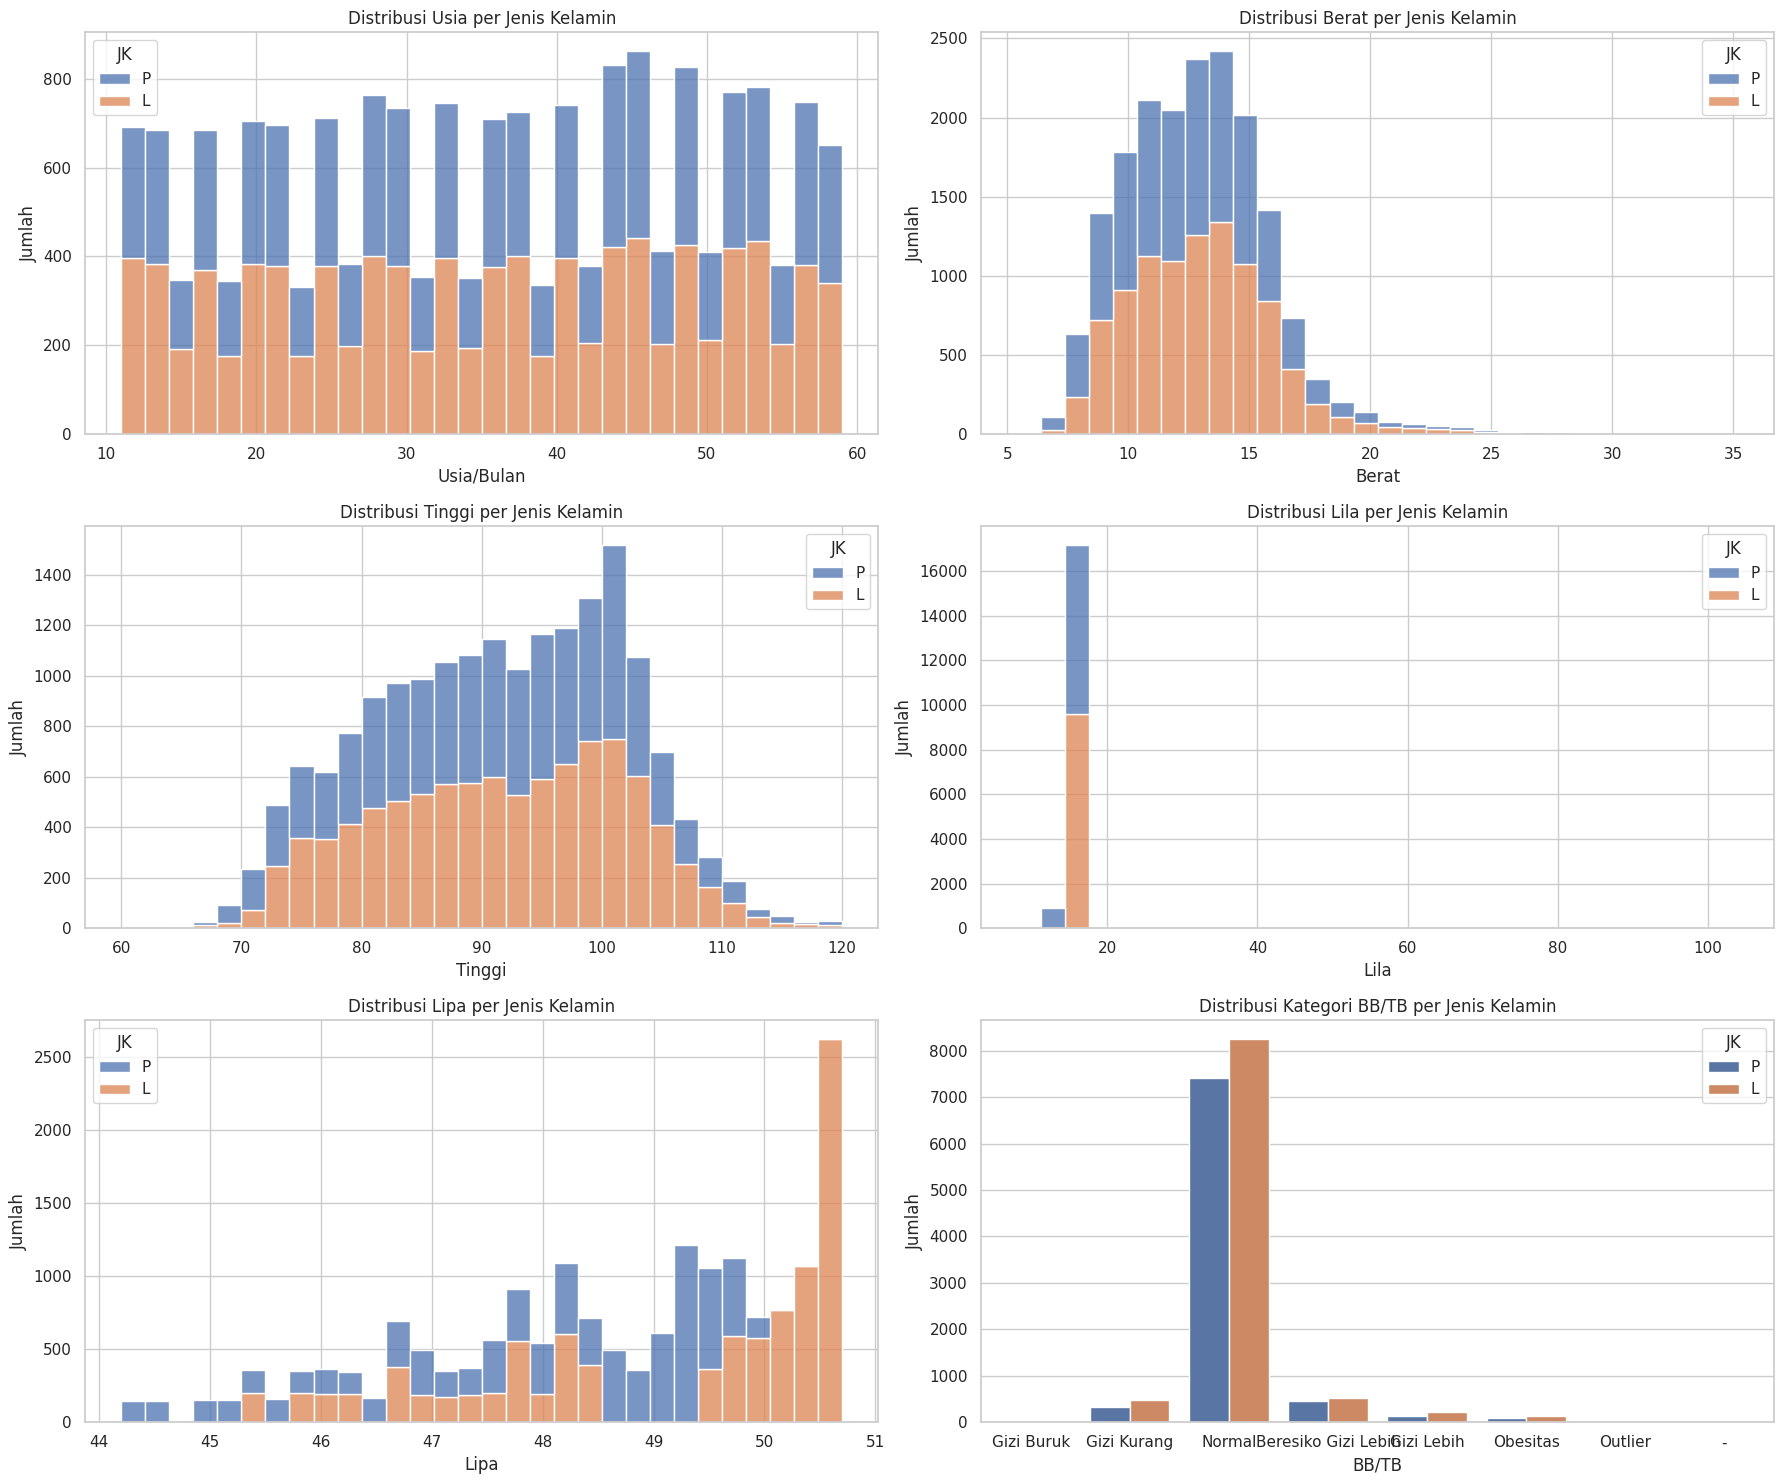

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set gaya visual
sns.set(style="whitegrid")

# Buat figure dan axis
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 15))
axes = axes.flatten()

# Fitur yang akan divisualisasikan
features = ['Usia/Bulan', 'Berat', 'Tinggi', 'Lila', 'Lipa', 'BB/TB']
titles = [
    "Distribusi Usia per Jenis Kelamin",
    "Distribusi Berat per Jenis Kelamin",
    "Distribusi Tinggi per Jenis Kelamin",
    "Distribusi Lila per Jenis Kelamin",
    "Distribusi Lipa per Jenis Kelamin",
    "Distribusi Kategori BB/TB per Jenis Kelamin"
]

# Loop untuk membuat setiap barplot
for i, feature in enumerate(features):
    ax = axes[i]
    if feature != 'BB/TB':
        sns.histplot(data=df_filtered, x=feature, hue='JK', multiple='stack', bins=30, ax=ax)
    else:
        sns.countplot(data=df_filtered, x=feature, hue='JK', ax=ax)
    ax.set_title(titles[i])
    ax.set_xlabel(feature)
    ax.set_ylabel("Jumlah")

plt.tight_layout()
plt.show()


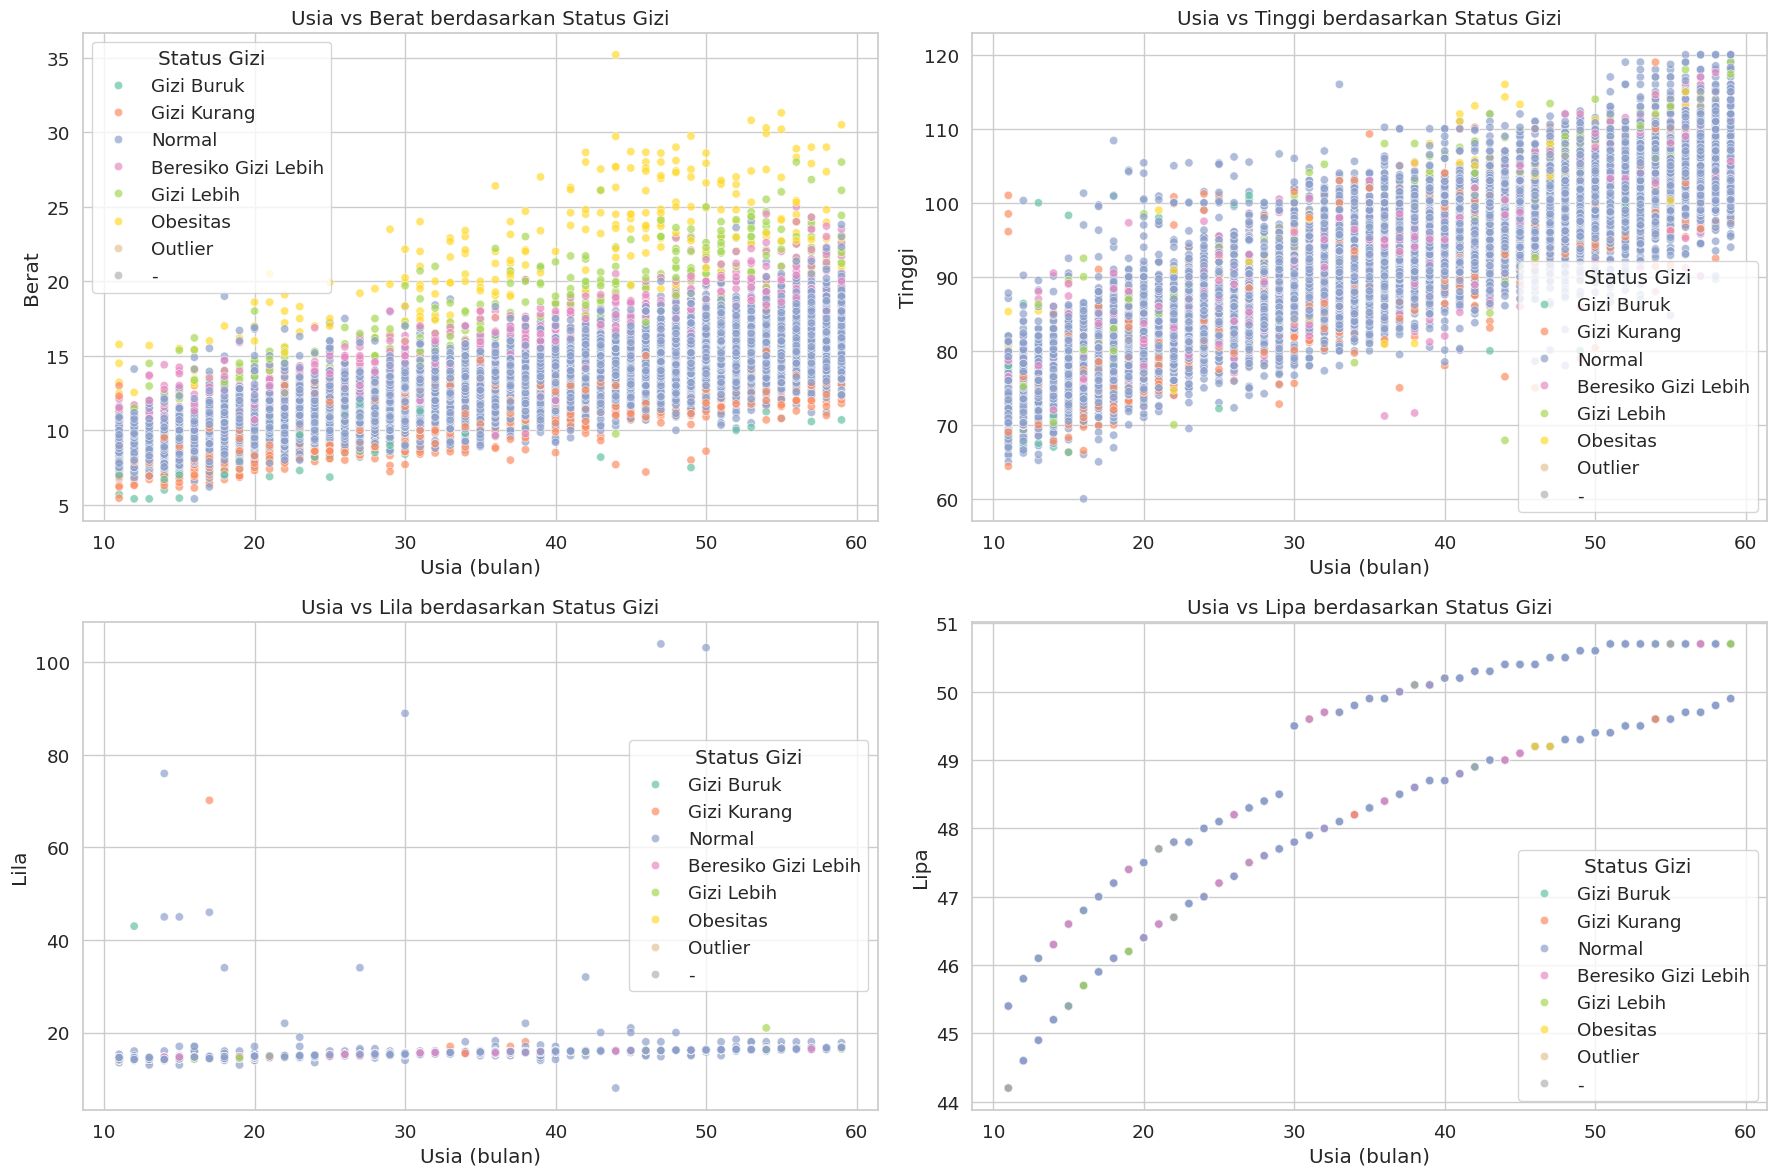

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set gaya visual
sns.set(style="whitegrid", font_scale=1.2)

# Buat figure dan axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
axes = axes.flatten()

# Daftar fitur dan judul
features = ['Berat', 'Tinggi', 'Lila', 'Lipa']
titles = [
    'Usia vs Berat berdasarkan Status Gizi',
    'Usia vs Tinggi berdasarkan Status Gizi',
    'Usia vs Lila berdasarkan Status Gizi',
    'Usia vs Lipa berdasarkan Status Gizi'
]

# Scatter plot per fitur
for i, feature in enumerate(features):
    ax = axes[i]
    sns.scatterplot(
        data=df_filtered,
        x='Usia/Bulan',
        y=feature,
        hue='BB/TB',  # berdasarkan status gizi
        palette='Set2',
        alpha=0.7,
        ax=ax
    )
    ax.set_title(titles[i])
    ax.set_xlabel('Usia (bulan)')
    ax.set_ylabel(feature)
    ax.legend(title='Status Gizi')

plt.tight_layout()
plt.show()


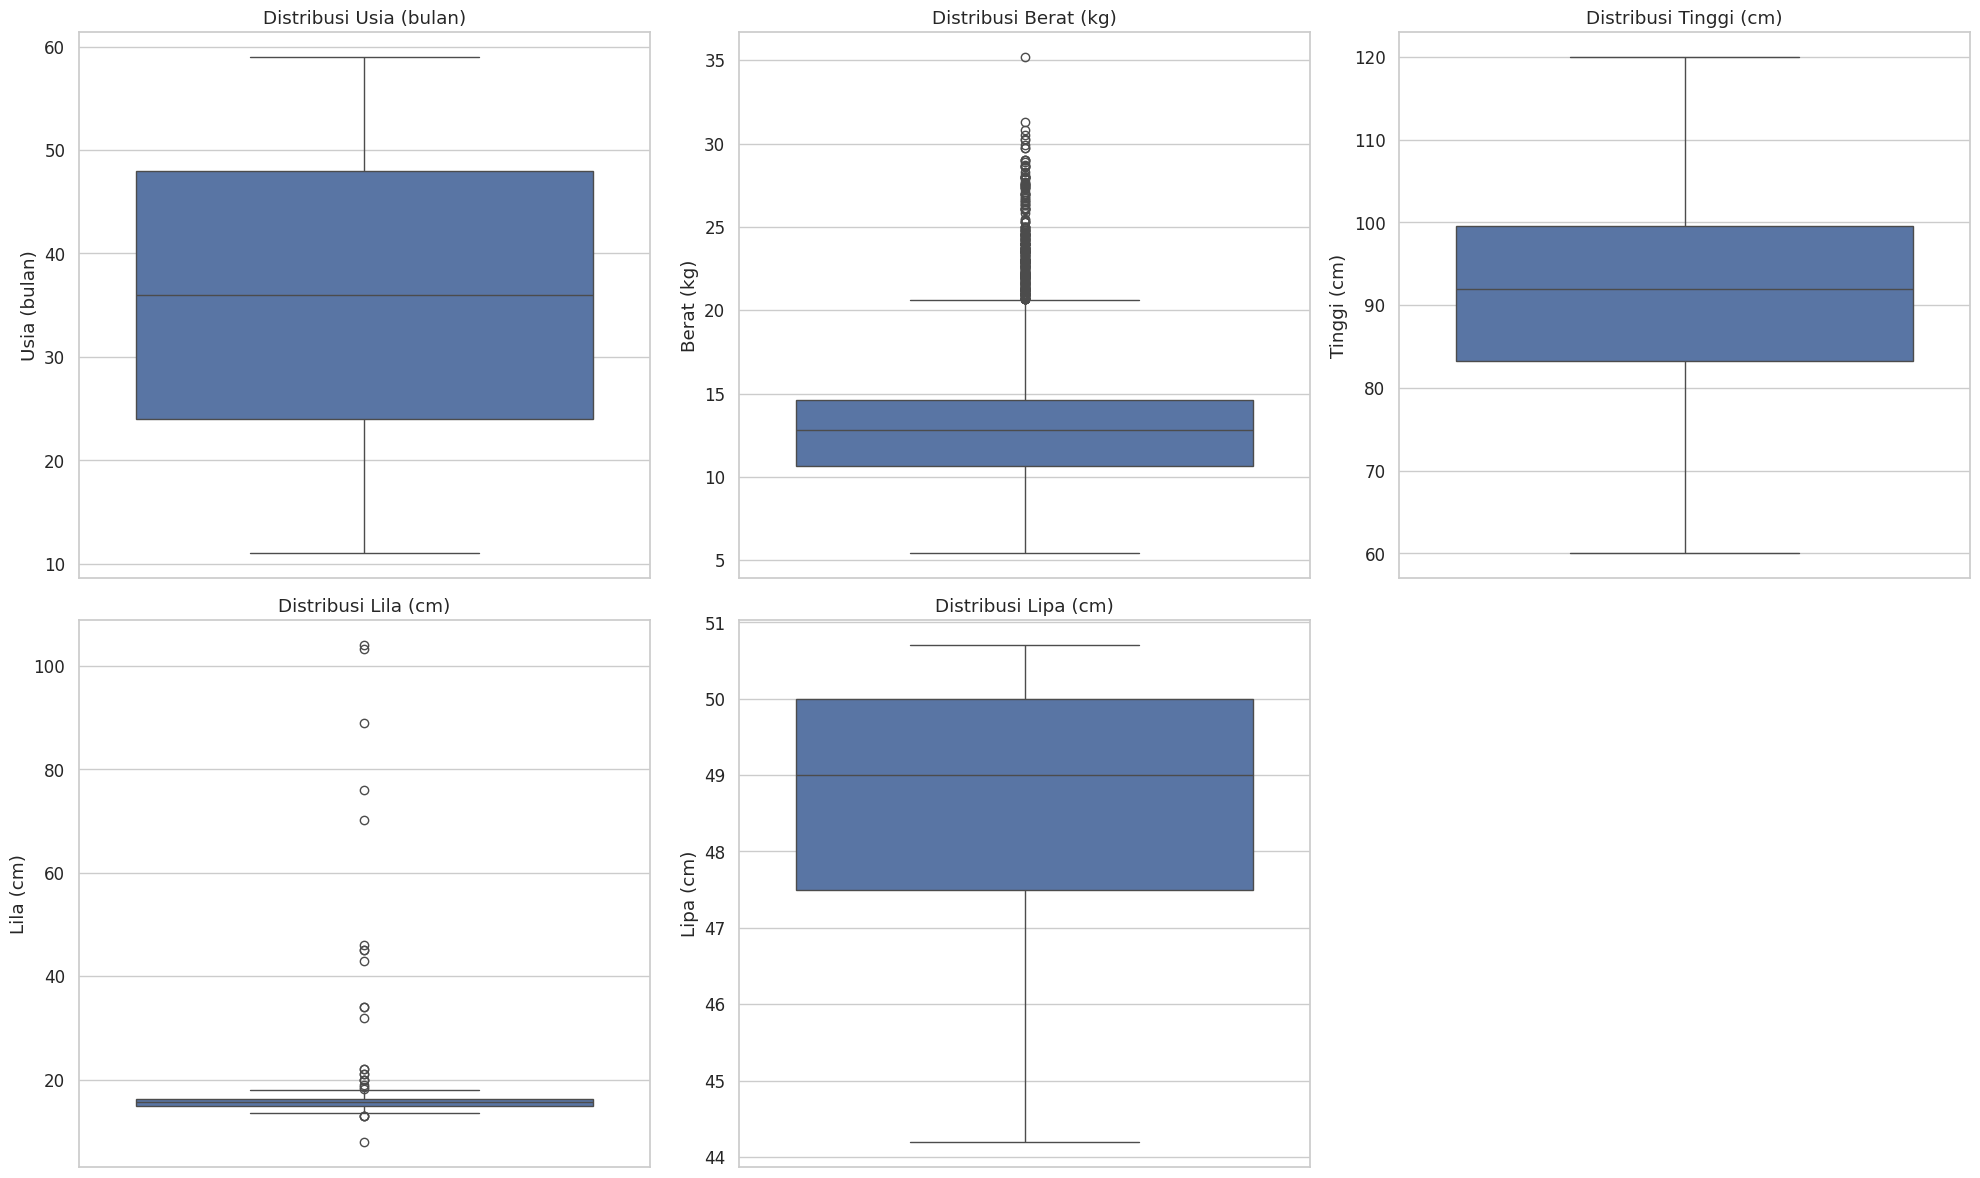

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid", font_scale=1.1)

# Fitur yang ingin diplot
features = ['Usia/Bulan', 'Berat', 'Tinggi', 'Lila', 'Lipa']
titles = ['Usia (bulan)', 'Berat (kg)', 'Tinggi (cm)', 'Lila (cm)', 'Lipa (cm)']

# Buat figure dan axes
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))
axes = axes.flatten()

# Loop boxplot untuk tiap fitur
for i, feature in enumerate(features):
    sns.boxplot(data=df_filtered, y=feature, ax=axes[i])
    axes[i].set_title(f'Distribusi {titles[i]}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(titles[i])

# Kosongkan sisa plot jika jumlah axes lebih dari fitur
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [21]:
def count_outliers_iqr(df, columns):
    outlier_counts = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts[col] = len(outliers)
    return outlier_counts

# Daftar fitur yang ingin diperiksa
fitur_numerik = ['Usia/Bulan', 'Berat', 'Tinggi', 'Lila', 'Lipa']

# Hitung jumlah outlier
outlier_counts = count_outliers_iqr(df_filtered, fitur_numerik)
print(outlier_counts)


{'Usia/Bulan': 0, 'Berat': 304, 'Tinggi': 0, 'Lila': 26, 'Lipa': 0}


Cara handle outliers

1) reducing the weights of outliers (trimming weight) 2) changing the values of outliers (Winsorisation, trimming, imputation) 3) using robust estimation techniques (M-estimation).

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

# Duplikasi data
df_winsor = df_filtered.copy()
features = ['Usia/Bulan', 'Berat', 'Tinggi', 'Lila', 'Lipa']
titles = ['Usia (bulan)', 'Berat (kg)', 'Tinggi (cm)', 'Lila (cm)', 'Lipa (cm)']

# Fungsi hitung outlier berdasarkan IQR
def count_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((series < lower) | (series > upper)).sum()

# Hitung jumlah outlier sebelum Winsor
print("Jumlah outlier sebelum Winsorization:")
total_before = 0
for feature in features:
    outliers = count_outliers_iqr(df_filtered[feature])
    print(f"{feature}: {outliers}")
    total_before += outliers
print(f"Total outlier sebelum: {total_before}\n")

# Lakukan Winsorization (batas 5% bawah & atas)
for col in features:
    df_winsor[col] = winsorize(df_filtered[col], limits=[0.05, 0.05])

# Hitung jumlah outlier setelah Winsor
print("Jumlah outlier setelah Winsorization:")
total_after = 0
for feature in features:
    outliers = count_outliers_iqr(df_winsor[feature])
    print(f"{feature}: {outliers}")
    total_after += outliers
print(f"Total outlier setelah: {total_after}")


Jumlah outlier sebelum Winsorization:
Usia/Bulan: 0
Berat: 304
Tinggi: 0
Lila: 26
Lipa: 0
Total outlier sebelum: 330

Jumlah outlier setelah Winsorization:
Usia/Bulan: 0
Berat: 0
Tinggi: 0
Lila: 0
Lipa: 0
Total outlier setelah: 0


/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask'

Fungsi winsorize() memotong nilai ekstrim pada 5% teratas dan terbawah.

Nilai ekstrim diganti dengan nilai pada batas 5% tersebut.

Hal ini bertujuan mengurangi dampak outlier tanpa membuang data.

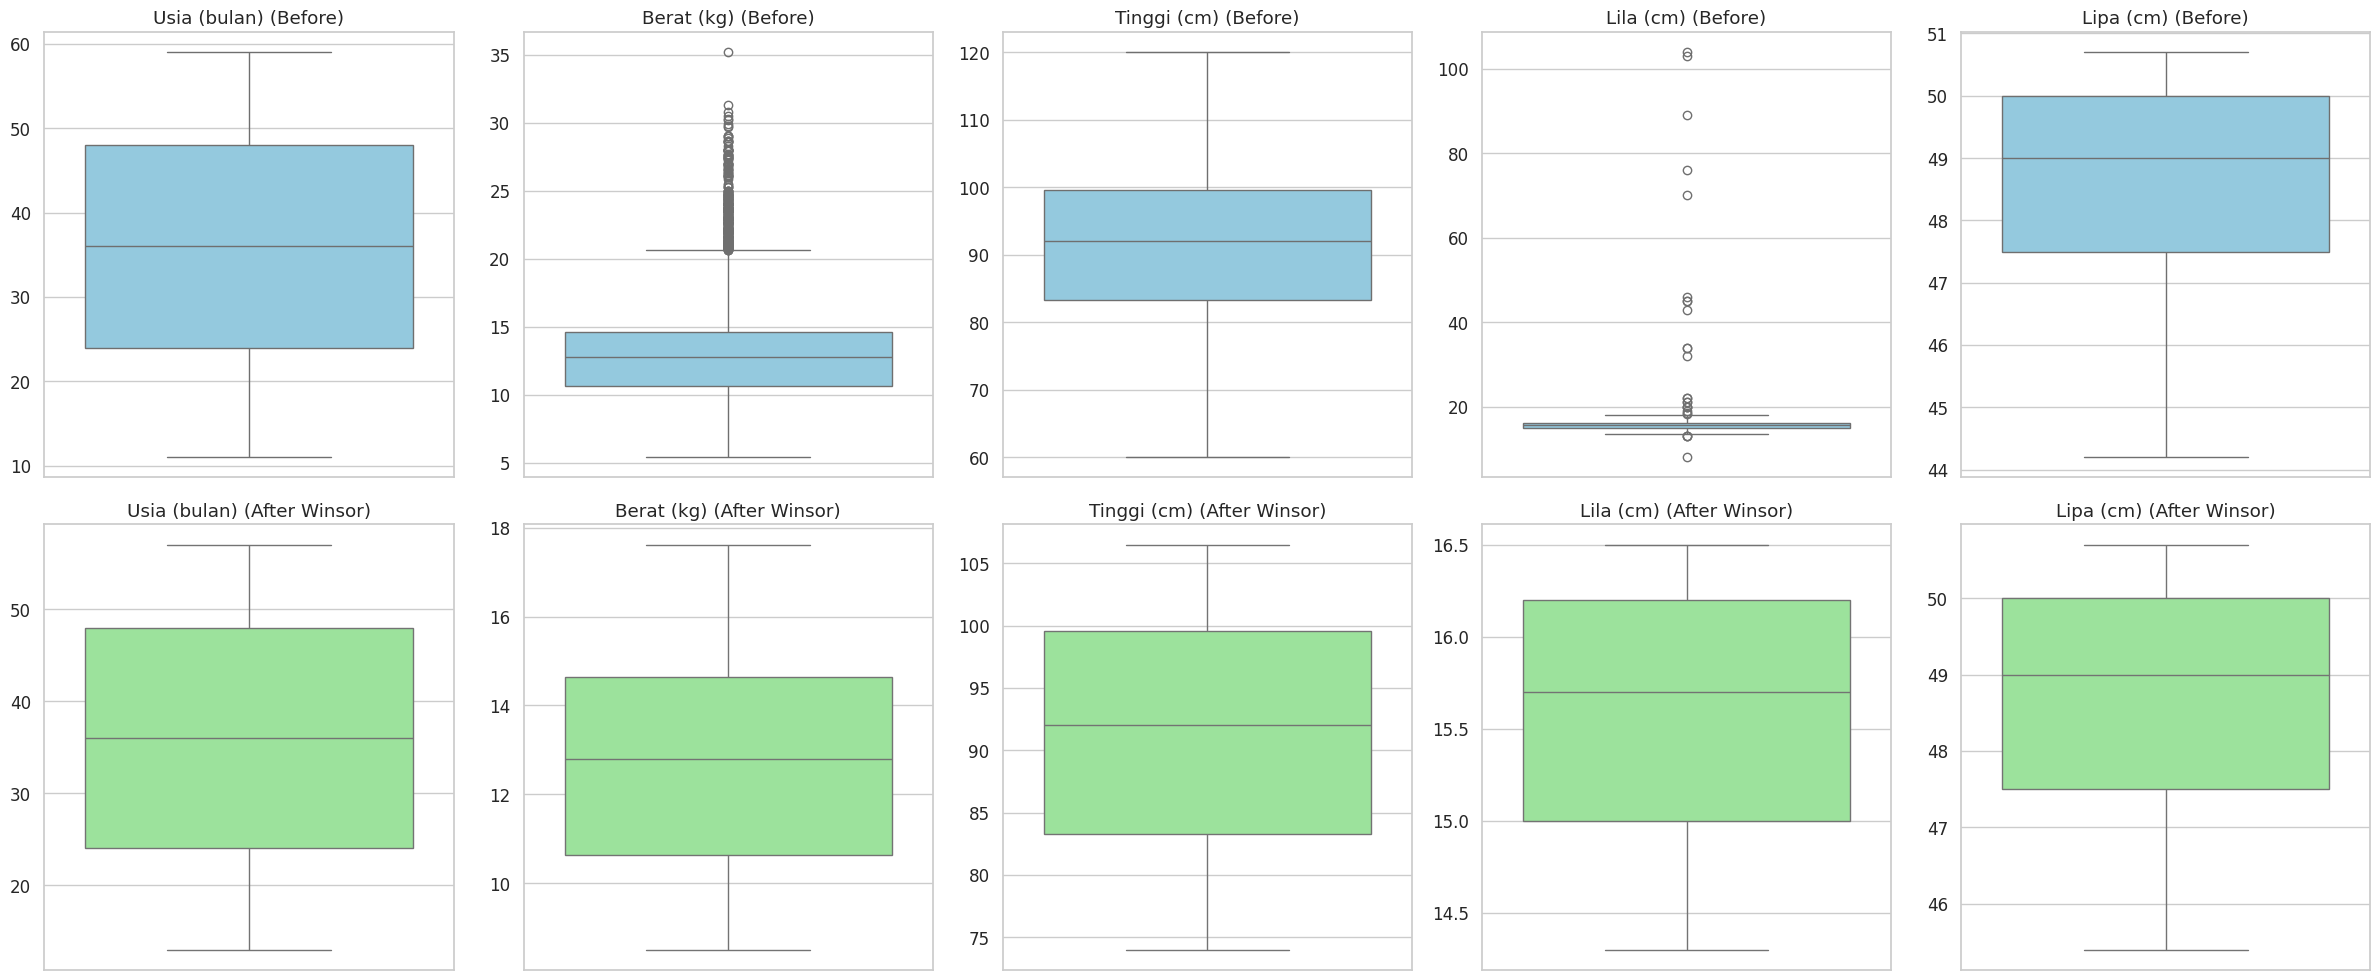

In [23]:
# Visualisasi perbandingan boxplot
sns.set(style="whitegrid", font_scale=1.1)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(24, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    # Sebelum
    sns.boxplot(y=df_filtered[feature], ax=axes[i], color='skyblue')
    axes[i].set_title(f'{titles[i]} (Before)')
    axes[i].set_ylabel('')

    # Sesudah
    sns.boxplot(y=df_winsor[feature], ax=axes[i+5], color='lightgreen')
    axes[i+5].set_title(f'{titles[i]} (After Winsor)')
    axes[i+5].set_ylabel('')

plt.tight_layout()
plt.show()


Mengidentifikasi dan menghapus nilai-nilai ekstrim dari data.

Memastikan analisis selanjutnya tidak bias akibat data ekstrem.

Menampilkan perbandingan visual antara data sebelum dan sesudah outlier dihapus.

Dapat dengan cepat melihat apakah distribusi data menjadi lebih normal dan bersih dari nilai ekstrim.

In [25]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder untuk status gizi dan jenis kelamin
le_gizi = LabelEncoder()
le_jk = LabelEncoder()

# Encoding kolom 'BB/TB'
df_winsor['BB/TB_encoded'] = le_gizi.fit_transform(df_winsor['BB/TB'])

# Encoding kolom 'JK'
df_winsor['JK_encoded'] = le_jk.fit_transform(df_winsor['JK'])

# Tampilkan mapping dari kategori ke angka
print("Mapping kategori BB/TB ke angka:")
for label, enc in zip(le_gizi.classes_, le_gizi.transform(le_gizi.classes_)):
    print(f"{label} → {enc}")

print("\nMapping kategori JK ke angka:")
for label, enc in zip(le_jk.classes_, le_jk.transform(le_jk.classes_)):
    print(f"{label} → {enc}")

# Pisahkan fitur dan target
X = df_winsor[['Usia/Bulan', 'JK_encoded', 'Berat', 'Tinggi', 'Lila', 'Lipa']]
y = df_winsor['BB/TB_encoded']

# Cek 5 data pertama
print("\nFitur (X):")
print(X.head())

print("\nTarget (y):")
print(y.head())

Mapping kategori BB/TB ke angka:
Beresiko Gizi Lebih → 0
Gizi Buruk → 1
Gizi Kurang → 2
Gizi Lebih → 3
Normal → 4
Obesitas → 5

Mapping kategori JK ke angka:
L → 0
P → 1

Fitur (X):
   Usia/Bulan  JK_encoded  Berat  Tinggi  Lila  Lipa
0          30           1   9.95    84.9  15.3  47.8
1          31           0  10.90    87.6  15.6  49.6
2          15           1   8.50    76.0  14.3  45.4
3          42           1  11.50    93.0  15.9  48.9
4          15           1   8.50    74.0  14.3  45.4

Target (y):
0    4
1    4
2    4
3    4
4    4
Name: BB/TB_encoded, dtype: int64


Mengubah data kategori (teks) seperti “Status Gizi (BB/TB)” dan “Jenis Kelamin (JK)” menjadi angka agar bisa digunakan dalam pemodelan machine learning. Setelah itu, memisahkan data fitur dan target.

Mapping BB/TB: {'Beresiko Gizi Lebih': np.int64(0), 'Gizi Buruk': np.int64(1), 'Gizi Kurang': np.int64(2), 'Gizi Lebih': np.int64(3), 'Normal': np.int64(4), 'Obesitas': np.int64(5)}
Mapping JK: {'L': np.int64(0), 'P': np.int64(1)}


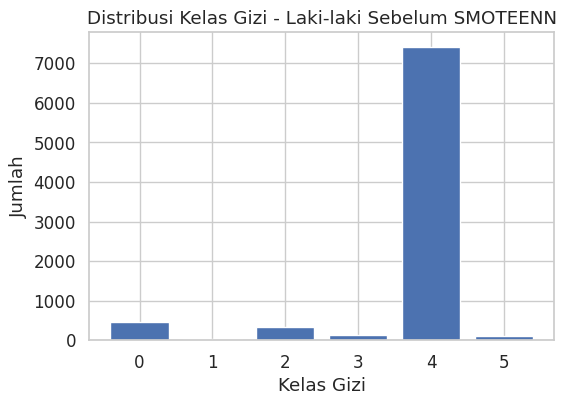

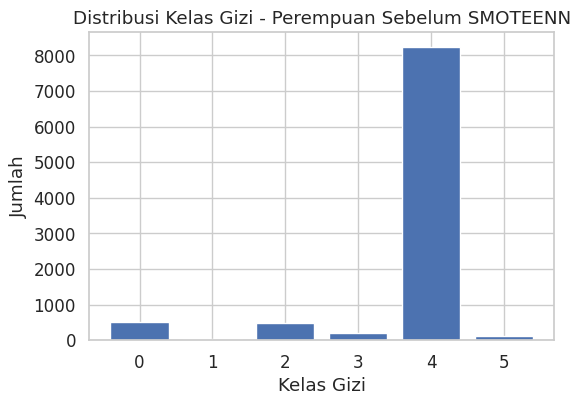

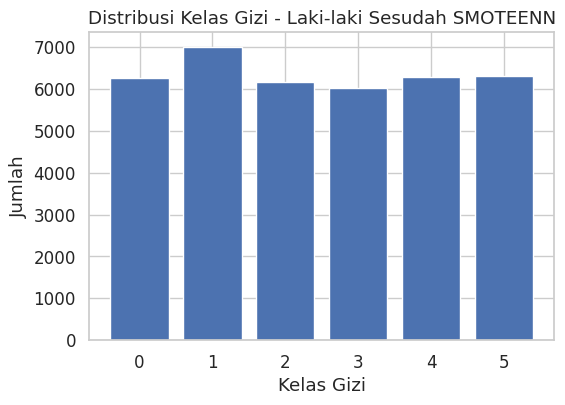

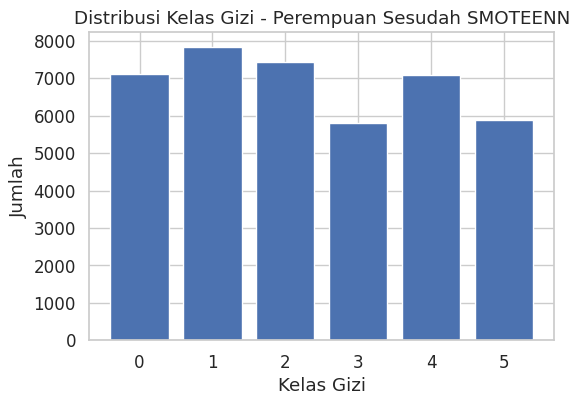

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from collections import Counter

# --- Encoding ---
le_gizi = LabelEncoder()
le_jk = LabelEncoder()
df_winsor['BB/TB_encoded'] = le_gizi.fit_transform(df_winsor['BB/TB'])
df_winsor['JK_encoded'] = le_jk.fit_transform(df_winsor['JK'])

# Mapping Keterangan
print("Mapping BB/TB:", dict(zip(le_gizi.classes_, le_gizi.transform(le_gizi.classes_))))
print("Mapping JK:", dict(zip(le_jk.classes_, le_jk.transform(le_jk.classes_))))

# --- Split Laki-laki dan Perempuan ---
df_L = df_winsor[df_winsor['JK_encoded'] == 1]
df_P = df_winsor[df_winsor['JK_encoded'] == 0]

X_L = df_L[['Usia/Bulan', 'Berat', 'Tinggi', 'Lila', 'Lipa']]
y_L = df_L['BB/TB_encoded']

X_P = df_P[['Usia/Bulan', 'Berat', 'Tinggi', 'Lila', 'Lipa']]
y_P = df_P['BB/TB_encoded']

# --- Visualisasi sebelum SMOTEENN ---
def plot_class_distribution(y, title):
    counter = Counter(y)
    plt.figure(figsize=(6, 4))
    plt.bar(counter.keys(), counter.values())
    plt.title(title)
    plt.xlabel("Kelas Gizi")
    plt.ylabel("Jumlah")
    plt.xticks(list(counter.keys()))
    plt.show()

plot_class_distribution(y_L, "Distribusi Kelas Gizi - Laki-laki Sebelum SMOTEENN")
plot_class_distribution(y_P, "Distribusi Kelas Gizi - Perempuan Sebelum SMOTEENN")

# --- SMOTEENN ---
smenn = SMOTEENN(random_state=42)
X_resampled_L, y_resampled_L = smenn.fit_resample(X_L, y_L)
X_resampled_P, y_resampled_P = smenn.fit_resample(X_P, y_P)

# --- Visualisasi setelah SMOTEENN ---
plot_class_distribution(y_resampled_L, "Distribusi Kelas Gizi - Laki-laki Sesudah SMOTEENN")
plot_class_distribution(y_resampled_P, "Distribusi Kelas Gizi - Perempuan Sesudah SMOTEENN")


In [30]:
# --- Buat DataFrame hasil resampling ---
df_resampled_L = pd.DataFrame(X_resampled_L, columns=['Usia/Bulan', 'Berat', 'Tinggi', 'Lila', 'Lipa'])
df_resampled_L['BB/TB_encoded'] = y_resampled_L
df_resampled_L['JK_encoded'] = 1  # laki-laki

df_resampled_P = pd.DataFrame(X_resampled_P, columns=['Usia/Bulan', 'Berat', 'Tinggi', 'Lila', 'Lipa'])
df_resampled_P['BB/TB_encoded'] = y_resampled_P
df_resampled_P['JK_encoded'] = 0  # perempuan

# --- Gabungkan data laki-laki dan perempuan ---
df_balanced = pd.concat([df_resampled_L, df_resampled_P], ignore_index=True)

# --- Cek hasil ---
print("Jumlah total data setelah SMOTEENN dan digabung:", len(df_balanced))
print(df_balanced['BB/TB_encoded'].value_counts())
print(df_balanced.head())


Jumlah total data setelah SMOTEENN dan digabung: 79208
BB/TB_encoded
1    14840
2    13601
0    13377
4    13367
5    12207
3    11816
Name: count, dtype: int64
   Usia/Bulan  Berat  Tinggi  Lila  Lipa  BB/TB_encoded  JK_encoded
0          13   9.60    74.0  14.3  45.4              0           1
1          15  10.00    74.0  14.3  45.4              0           1
2          15  10.10    75.0  14.3  45.4              0           1
3          14  10.53    76.1  14.3  45.4              0           1
4          26  10.63    77.0  15.0  47.3              0           1


In [31]:
# --- Normalisasi ---
scaler = MinMaxScaler()
fitur = ['Usia/Bulan', 'Berat', 'Tinggi', 'Lila', 'Lipa']
df_balanced[fitur] = scaler.fit_transform(df_balanced[fitur])


Melakukan normalisasi nilai fitur numerik agar berada dalam rentang 0 hingga 1. Ini penting untuk model seperti K-Nearest Neighbors (KNN) agar semua fitur memiliki skala yang setara.

In [36]:
# --- Pisahkan data berdasarkan JK kembali ---
df_balanced_L = df_balanced[df_balanced['JK_encoded'] == 0]
df_balanced_P = df_balanced[df_balanced['JK_encoded'] == 1]

# --- Split Train-Test ---
X_L = df_balanced_L[features + ['JK_encoded']]
y_L = df_balanced_L['BB/TB_encoded']
X_train_L, X_test_L, y_train_L, y_test_L = train_test_split(X_L, y_L, test_size=0.2, random_state=42, stratify=y_L)

X_P = df_balanced_P[features + ['JK_encoded']]
y_P = df_balanced_P['BB/TB_encoded']
X_train_P, X_test_P, y_train_P, y_test_P = train_test_split(X_P, y_P, test_size=0.2, random_state=42, stratify=y_P)

# --- Cek hasil split ---
print(f"Train data Laki-laki: {X_train_L.shape}, Test: {X_test_L.shape}")
print(f"Train data Perempuan: {X_train_P.shape}, Test: {X_test_P.shape}")


Train data Laki-laki: (32934, 6), Test: (8234, 6)
Train data Perempuan: (30432, 6), Test: (7608, 6)


Memisahkan data berdasarkan jenis kelamin (Laki-laki dan Perempuan), lalu membagi masing-masing ke dalam data latih (train) dan data uji (test) menggunakan metode stratified split agar proporsi label tetap seimbang.

   Evaluasi Model untuk Laki-laki


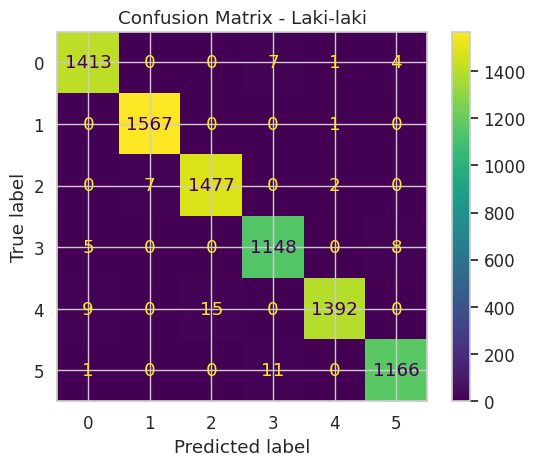


Classification Report (Laki-laki):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1425
           1       1.00      1.00      1.00      1568
           2       0.99      0.99      0.99      1486
           3       0.98      0.99      0.99      1161
           4       1.00      0.98      0.99      1416
           5       0.99      0.99      0.99      1178

    accuracy                           0.99      8234
   macro avg       0.99      0.99      0.99      8234
weighted avg       0.99      0.99      0.99      8234

AUC Score (Laki-laki): 0.9990
Mean Squared Error (Laki-laki): 0.0672
Root Mean Squared Error (Laki-laki): 0.2592



In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix,
    roc_auc_score,
    mean_squared_error,
    ConfusionMatrixDisplay,
    classification_report
)
import numpy as np
import matplotlib.pyplot as plt

# Inisialisasi model KNN
knn_L = KNeighborsClassifier(n_neighbors=3)
knn_P = KNeighborsClassifier(n_neighbors=3)

# -------------------------------
# Latih dan evaluasi untuk laki-laki
# -------------------------------
knn_L.fit(X_train_L, y_train_L)
y_pred_L = knn_L.predict(X_test_L)

print("=========================================")
print("   Evaluasi Model untuk Laki-laki")
print("=========================================")

# Confusion Matrix
cm_L = confusion_matrix(y_test_L, y_pred_L)
disp_L = ConfusionMatrixDisplay(confusion_matrix=cm_L)
disp_L.plot()
plt.title("Confusion Matrix - Laki-laki")
plt.show()

# Classification Report
print("\nClassification Report (Laki-laki):")
print(classification_report(y_test_L, y_pred_L))

# Metrik lainnya
auc_L = roc_auc_score(y_test_L, knn_L.predict_proba(X_test_L), multi_class='ovr')
mse_L = mean_squared_error(y_test_L, y_pred_L)
rmse_L = np.sqrt(mse_L)

print(f"AUC Score (Laki-laki): {auc_L:.4f}")
print(f"Mean Squared Error (Laki-laki): {mse_L:.4f}")
print(f"Root Mean Squared Error (Laki-laki): {rmse_L:.4f}\n")

   Evaluasi Model untuk Perempuan


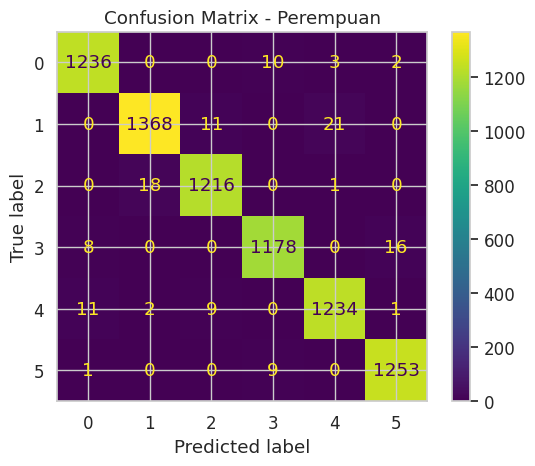


Classification Report (Perempuan):
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1251
           1       0.99      0.98      0.98      1400
           2       0.98      0.98      0.98      1235
           3       0.98      0.98      0.98      1202
           4       0.98      0.98      0.98      1257
           5       0.99      0.99      0.99      1263

    accuracy                           0.98      7608
   macro avg       0.98      0.98      0.98      7608
weighted avg       0.98      0.98      0.98      7608

AUC Score (Perempuan): 0.9958
Mean Squared Error (Perempuan): 0.1101
Root Mean Squared Error (Perempuan): 0.3319


In [43]:
# -------------------------------
# Latih dan evaluasi untuk perempuan
# -------------------------------
knn_P.fit(X_train_P, y_train_P)
y_pred_P = knn_P.predict(X_test_P)

print("=========================================")
print("   Evaluasi Model untuk Perempuan")
print("=========================================")

# Confusion Matrix
cm_P = confusion_matrix(y_test_P, y_pred_P)
disp_P = ConfusionMatrixDisplay(confusion_matrix=cm_P)
disp_P.plot()
plt.title("Confusion Matrix - Perempuan")
plt.show()

# Classification Report
print("\nClassification Report (Perempuan):")
print(classification_report(y_test_P, y_pred_P))

# Metrik lainnya
auc_P = roc_auc_score(y_test_P, knn_P.predict_proba(X_test_P), multi_class='ovr')
mse_P = mean_squared_error(y_test_P, y_pred_P)
rmse_P = np.sqrt(mse_P)

print(f"AUC Score (Perempuan): {auc_P:.4f}")
print(f"Mean Squared Error (Perempuan): {mse_P:.4f}")
print(f"Root Mean Squared Error (Perempuan): {rmse_P:.4f}")


In [41]:
import pickle
from sklearn.preprocessing import MinMaxScaler

# Asumsi df_balanced_L dan df_balanced_P tersedia dari langkah sebelumnya

# Fitur yang akan diskalakan (hanya fitur numerik)
features_to_scale = ['Usia/Bulan', 'Berat', 'Tinggi', 'Lila', 'Lipa']

# Inisialisasi dan latih scaler terpisah untuk data Laki-laki dan Perempuan
scaler_L = MinMaxScaler()
# Fit scaler hanya pada fitur numerik
scaler_L.fit(df_balanced_L[features_to_scale])

scaler_P = MinMaxScaler()
# Fit scaler hanya pada fitur numerik
scaler_P.fit(df_balanced_P[features_to_scale])


# Simpan scaler
with open("scaler_L.pkl", "wb") as f:
    pickle.dump(scaler_L, f)

with open("scaler_P.pkl", "wb") as f:
    pickle.dump(scaler_P, f)

# Simpan model KNN (asumsi knn_L dan knn_P tersedia dari langkah sebelumnya)
with open("KNN_L.pkl", "wb") as f:
    pickle.dump(knn_L, f)

with open("KNN_P.pkl", "wb") as f:
    pickle.dump(knn_P, f)

print("Scalers dan model KNN berhasil disimpan.")

Scalers dan model KNN berhasil disimpan.


/tmp/ipython-input-430757111.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_balanced_L[features_to_scale] = scaler_L.fit_transform(df_balanced_L[features_to_scale])
/tmp/ipython-input-430757111.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_balanced_P[features_to_scale] = scaler_P.fit_transform(df_balanced_P[features_to_scale])


In [46]:
import pickle
import numpy as np

# === Mapping kategori BB/TB ===
gizi_mapping = {
    'Beresiko Gizi Lebih': 0,
    'Gizi Buruk': 1,
    'Gizi Kurang': 2,
    'Gizi Lebih': 3,
    'Normal': 4,
    'Obesitas': 5
}
reverse_mapping = {v: k for k, v in gizi_mapping.items()}

# === Memuat model dan scaler ===
with open('KNN_L.pkl', 'rb') as file:
    knn_L = pickle.load(file)
with open('KNN_P.pkl', 'rb') as file:
    knn_P = pickle.load(file)
with open('scaler_L.pkl', 'rb') as file:
    scaler_L = pickle.load(file)
with open('scaler_P.pkl', 'rb') as file:
    scaler_P = pickle.load(file)

print("Model dan scaler berhasil dimuat.")

# === Fungsi untuk memprediksi data baru ===
def prediksi_status_gizi(data_baru: list):
    """
    Format data_baru: [usia_bulan, jk_encoded, berat, tinggi, lila, lipa]
    jk_encoded: 0 untuk Laki-laki, 1 untuk Perempuan
    """
    data_np = np.array(data_baru).reshape(1, -1)
    jk = data_np[0, 1]

    # Pisahkan fitur numerik dan JK_encoded
    numerical_features = data_np[:, [0, 2, 3, 4, 5]] # Usia/Bulan, Berat, Tinggi, Lila, Lipa
    jk_feature = data_np[:, [1]] # JK_encoded

    # Pilih model dan scaler berdasarkan jenis kelamin
    if jk == 0:
        # Skalakan fitur numerik
        numerical_scaled = scaler_L.transform(numerical_features)
        # Gabungkan kembali dengan JK_encoded
        data_scaled = np.concatenate((numerical_scaled, jk_feature), axis=1)
        pred = knn_L.predict(data_scaled)
    elif jk == 1:
        # Skalakan fitur numerik
        numerical_scaled = scaler_P.transform(numerical_features)
        # Gabungkan kembali dengan JK_encoded
        data_scaled = np.concatenate((numerical_scaled, jk_feature), axis=1)
        pred = knn_P.predict(data_scaled)
    else:
        raise ValueError("Nilai JK_encoded harus 0 (Laki-laki) atau 1 (Perempuan)")

    return reverse_mapping[pred[0]]

# === Contoh data baru ===
data_baru_L = [45, 0, 16.01, 97.5, 16.1, 50.4]
data_baru_P = [42, 1, 16.04, 93.0, 15.9, 48.9]

hasil_L = prediksi_status_gizi(data_baru_L)
hasil_P = prediksi_status_gizi(data_baru_P)

print(f"Hasil prediksi untuk data baru (Laki-laki): {hasil_L}")
print(f"Hasil prediksi untuk data baru (Perempuan): {hasil_P}")

Model dan scaler berhasil dimuat.
Hasil prediksi untuk data baru (Laki-laki): Obesitas
Hasil prediksi untuk data baru (Perempuan): Gizi Lebih


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
